## Bankruptcy Detection

Project by **Gregorio Bufalari** ,  **Nevro Cerasani**

## Project Structure



1. **Data Acquisition and Cleaning**:
   Database Structure -
   Variancethreshold -
   Correlation.





2. **Machine Learning**: Unbalanced Dataset (Logistic Regression, SVC, Isolation Forest, LOF), Balanced Dataset (SMOTE, ADASYN).




3. **Conclusion and Insights**: Features, Machine Learning, Improvements. 

## 1. Data Acquisition and Cleaning

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE, SVMSMOTE, ADASYN
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings(action="ignore")

In [7]:
bank_db = pd.read_csv('data.csv', sep=r'\s*,\s*')
bank_db.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [3]:
bank_db.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [4]:
bank_db.shape

(6819, 96)

There are 6819 rows and 96 columns.

In [5]:
bank_db.isnull().sum().sum()

0

There are no missing values.

In [6]:
bank_db.duplicated().sum()

0

There are no duplicate values.

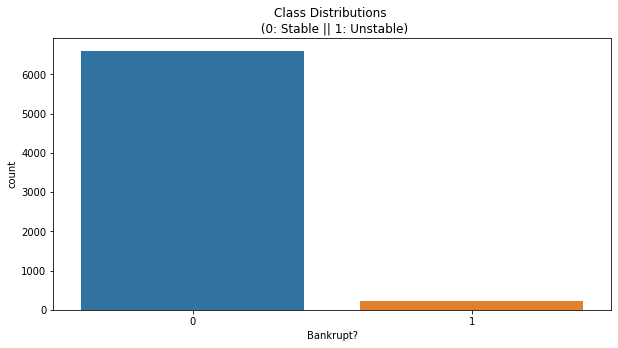

In [7]:
plt.figure(figsize = (10,5))
sns.countplot(bank_db['Bankrupt?'])
plt.title('Class Distributions \n (0: Stable || 1: Unstable)', fontsize=12)
plt.show()

<div style="text-align: justify">This is a binary classification problem: our target is composed by 2 different categories: 0 is the case which represents a stable bank and 1 is the case of unstable banks, so there's probability for default. As we can see, the classes are strongly unbalanced, but it is normal since in reality most of the bank do not fail and the percentage of failure is very low.<div>
    

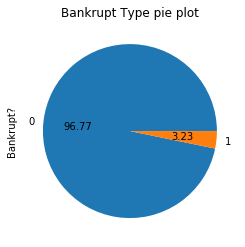

In [8]:
bank_db['Bankrupt?'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Bankrupt Type pie plot');

96.77% of observations belongs to class 0 (stable bank) while only 3.23% belongs to class 1 (unstable).

In [102]:
bank_db = bank_db.rename(columns = {'Bankrupt?': 'Y'})
bank_db = bank_db.reindex(sorted(bank_db.columns), axis=1)
bank_db.head(10) 

,Accounts Receivable Turnover,After-tax Net Profit Growth Rate,After-tax net Interest Rate,Allocation rate per person,Average Collection Days,Borrowing dependency,CFO to Assets,Cash Flow Per Share,Cash Flow to Equity,Cash Flow to Liability,...,Total Asset Return Growth Rate Ratio,Total Asset Turnover,Total assets to GNP price,Total debt/Total net worth,Total expense/Assets,Total income/Total expense,Working Capital to Total Assets,Working Capital/Equity,Working capitcal Turnover Rate,Y
0,0.001814,0.688979,0.808809,0.037135,0.003487,0.390284,0.520382,0.311664,0.312905,0.458609,...,0.263100,0.086957,0.009219,0.021266,0.064856,0.002022,0.672775,0.721275,0.593831,1
1,0.001286,0.689693,0.809301,0.012335,0.004917,0.376760,0.567101,0.318137,0.314163,0.459001,...,0.264516,0.064468,0.008323,0.012502,0.025516,0.002226,0.751111,0.731975,0.593916,1
2,0.001495,0.689463,0.808388,0.141016,0.004227,0.379093,0.538491,0.307102,0.314515,0.459254,...,0.264184,0.014993,0.040003,0.021248,0.021387,0.002060,0.829502,0.742729,0.594502,1
3,0.001966,0.689110,0.808966,0.021320,0.003215,0.379743,0.604105,0.321674,0.302382,0.448518,...,0.263371,0.089955,0.003252,0.009572,0.024161,0.001831,0.725754,0.729825,0.593889,1
4,0.001449,0.689697,0.809304,0.023988,0.004367,0.375025,0.578469,0.319162,0.311567,0.454411,...,0.265218,0.175412,0.003878,0.005150,0.026385,0.002224,0.751822,0.732000,0.593915,1
5,0.001528,0.689105,0.808771,0.032829,0.004137,0.381448,0.622190,0.325387,0.313268,0.458499,...,0.263250,0.095952,0.005278,0.014213,0.040094,0.001866,0.686729,0.725202,0.593846,1
6,0.001662,0.688590,0.808960,0.009703,0.003805,0.384999,0.560653,0.316687,0.310296,0.457785,...,0.263032,0.100450,0.018372,0.024441,0.092802,0.002121,0.729416,0.728731,0.593893,0
7,0.001335,0.689535,0.809362,0.007058,0.004740,0.374219,0.610091,0.324114,0.314364,0.458954,...,0.264112,0.218891,0.010005,0.005278,0.025482,0.002360,0.797005,0.734946,0.593937,0
8,0.001303,0.689924,0.809338,0.008815,0.004855,0.370253,0.574033,0.318773,0.315376,0.462165,...,0.264151,0.154423,0.000824,0.002266,0.029884,0.002274,0.813738,0.735182,0.593959,0
9,0.001469,0.689338,0.809320,0.005721,0.004303,0.374509,0.645146,0.330162,0.314645,0.459379,...,0.263883,0.347826,0.005798,0.006354,0.035891,0.002269,0.825696,0.737180,0.593936,0


In [103]:
X = bank_db.iloc[:, :len(bank_db.columns)-1]
y = bank_db.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

threshold = 0.8
best_features = VarianceThreshold(threshold = threshold)
fit = best_features.fit(X_train)
X_columns = X.columns
new_columns = X.columns[fit.get_support()]

In [104]:
X_train = X_train.loc[:, new_columns]
X_test = X_test.loc[:, new_columns]
X_train.head()

,Accounts Receivable Turnover,Allocation rate per person,Average Collection Days,Cash Turnover Rate,Cash/Current Liability,Current Asset Turnover Rate,Current Ratio,Fixed Assets Turnover Frequency,Interest-bearing debt interest rate,Inventory Turnover Rate (times),...,Operating Expense Rate,Quick Asset Turnover Rate,Quick Assets/Current Liability,Quick Ratio,Research and development expense rate,Revenue Per Share (Yuan ¥),Revenue per person,Total Asset Growth Rate,Total assets to GNP price,Total debt/Total net worth
3759,0.000820,0.013654,0.007710,2.560000e+09,0.002388,9.460000e+09,0.009253,0.000191,0.000281,1.119688e-04,...,7.000000e+09,6.390000e+09,0.005957,0.005780,2.700000e+09,0.052286,0.020366,5.560000e+09,0.005821,0.010735
1782,0.000625,0.000664,0.010125,1.680341e-04,0.007710,2.681255e-04,0.011845,0.005545,0.000164,5.870000e+09,...,1.938068e-04,1.951601e-04,0.008227,0.007728,1.353189e-04,0.029297,0.026597,1.039851e-04,0.000481,0.007986
5013,0.000889,0.003322,0.007109,9.230000e+08,0.005095,1.576788e-04,0.008609,0.000315,0.000285,7.850000e+09,...,2.028264e-04,1.103110e-04,0.005747,0.005343,1.005129e-04,0.025107,0.006357,1.077029e-04,0.001397,0.004126
5412,0.000996,0.016025,0.006349,5.080000e+06,0.000609,7.100000e+09,0.009350,0.001986,0.000404,3.349510e-04,...,3.280000e+08,6.270000e+09,0.007583,0.007319,0.000000e+00,0.146891,0.141551,9.200000e+09,0.000998,0.016674
3066,0.000692,0.006717,0.009149,7.680000e+08,0.000628,1.033323e-04,0.008758,0.000875,0.000405,2.407520e-04,...,1.021070e-04,9.330000e+09,0.007363,0.007495,0.000000e+00,0.071313,0.046103,6.520000e+09,0.002826,0.010057


<div style="text-align: justify">The new dataset is composed by 23 columns which represent the most significant variables affecting the response. We can find Interests, Current Asset and Debt, of course these are the variables which determine at most the stability of a bank. Let's think about a real situation: the interests rate, a bank's assets, its revenues debt are most significant parameters for stability in the current economic system.<div>

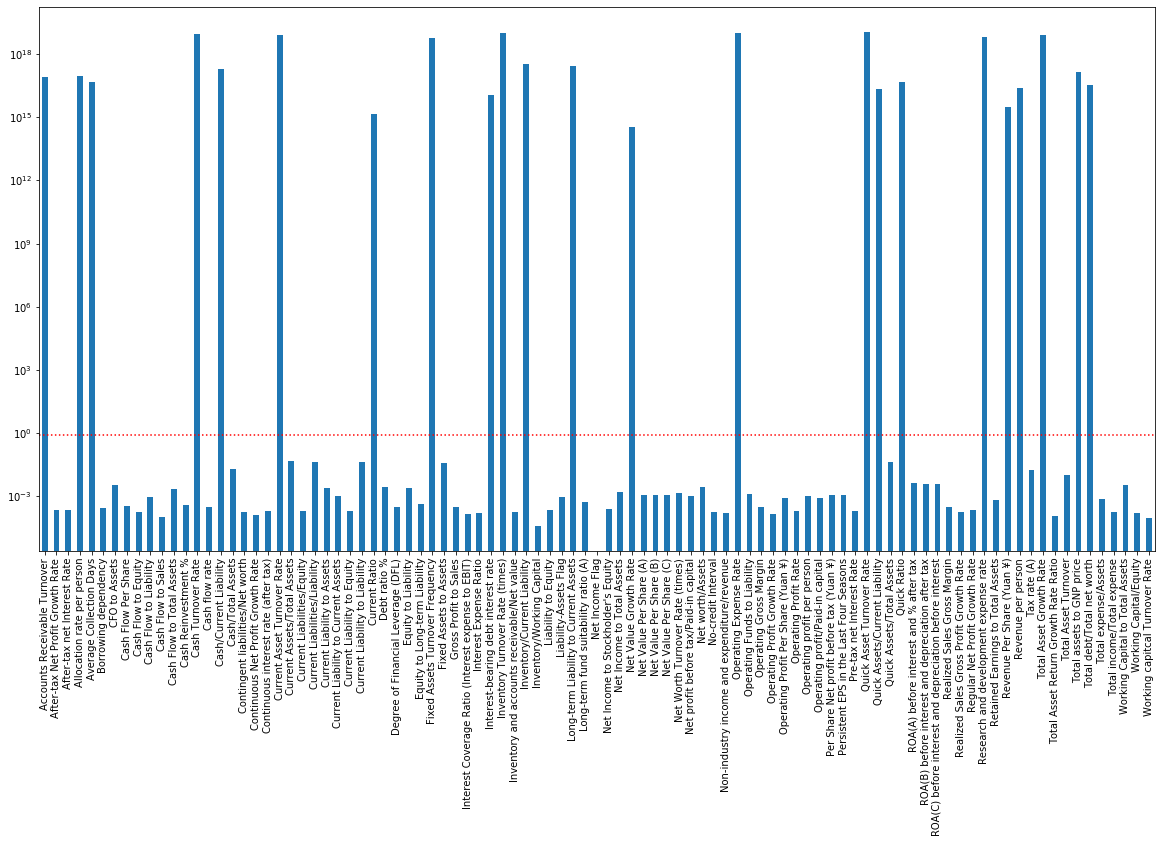

In [111]:
plt.figure(figsize=(20,10))
ax = pd.Series(best_features.variances_, index=X.columns).plot(kind='bar', logy=True);
ax.axhline(threshold, ls='dotted', c='r')

The graph above shows how Variancethreshold works, in fact the highest bars are the covariates which the most variance (are the same selected in the new dataset).

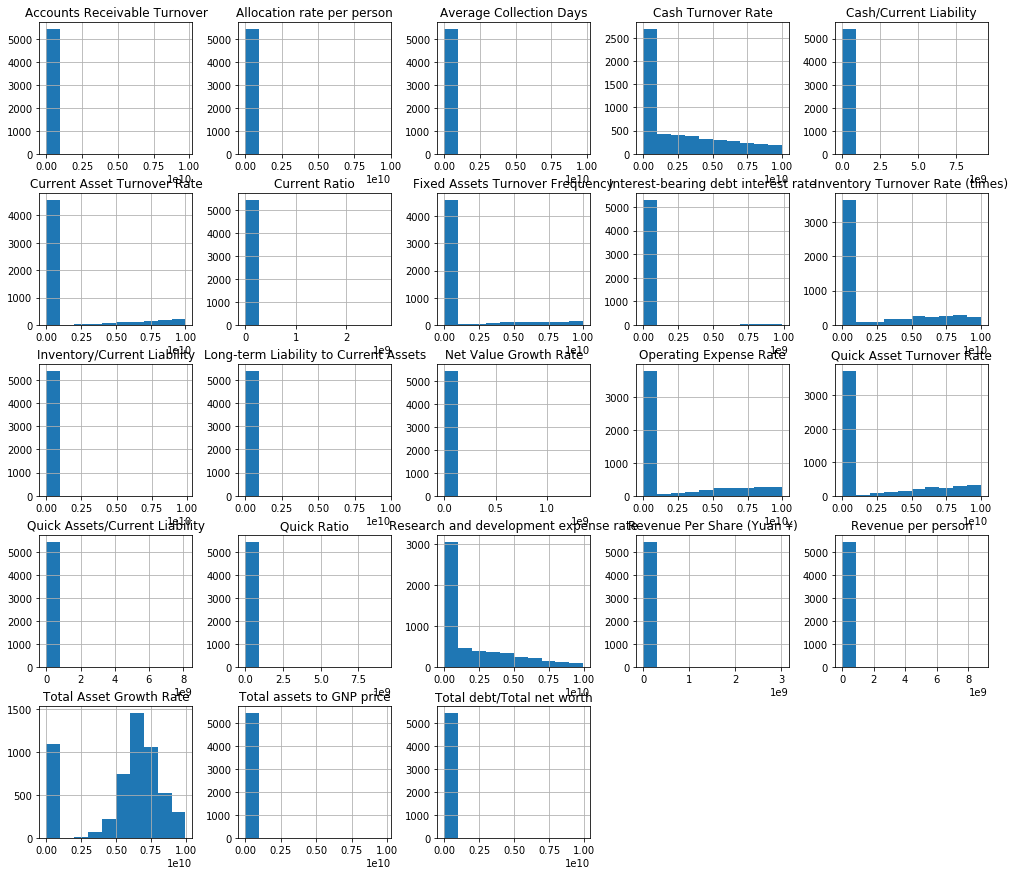

In [106]:
X_train.hist(figsize = (17,15), bins = 10)
plt.show()

<div style="text-align: justify">The distribution of the covariates is more concentrated on the stable bank case for the reason explained before. Let's look at Cash Turnover Rate, for example, it moves to zero when the Bank move to an unstable situation, this makes sense beacuse there isn't more cash flow inside the bank. Or let's look at Total Asset Growth Rate it looks that maximum value is between the two extreme cases but more nearer to the unstable case, this could be reasonable since when a Bank constructs Assets (investement portfolio..), moves from a stable situation to an unstable one beacuse the risk increases since the bank exposed itself on the market.<div>




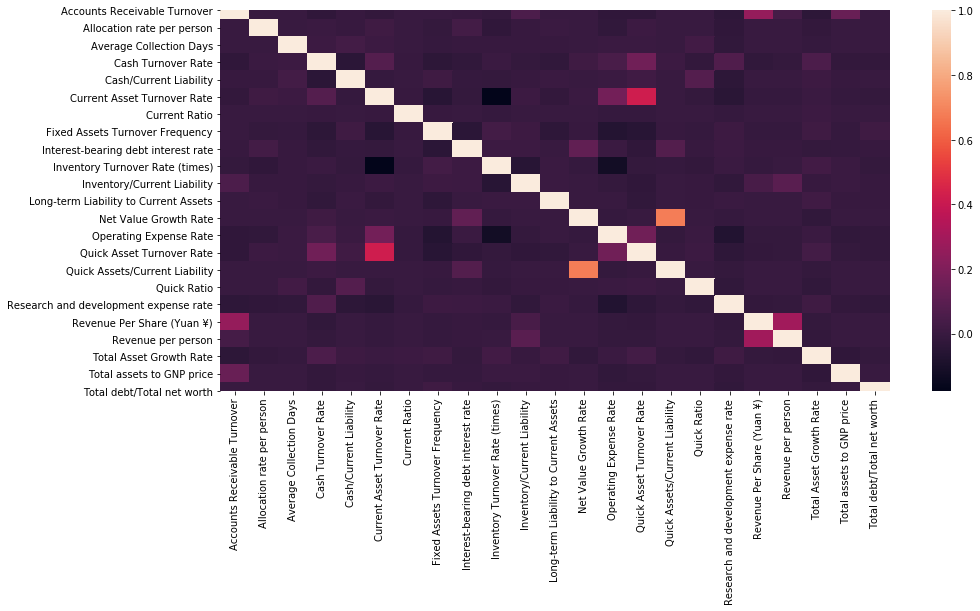

In [13]:
f, ax = plt.subplots(figsize=(15, 7))
corrMatrix = X_train.corr()
ax = sns.heatmap(corrMatrix)
plt.show()

<div style="text-align: justify">As we can see from the correlation plot, there might be a collinearity problem among Quick Asset Turnover Rate - Current Asset Turnover Rate, and Net Value Growth Rate - Quick Assets/Current Liability. Therefore, we decided to investigate their relationships and eventually to drop one of them.<div>

Text(0.5, 1.0, 'Net Value Growth and QA/CL Rate')

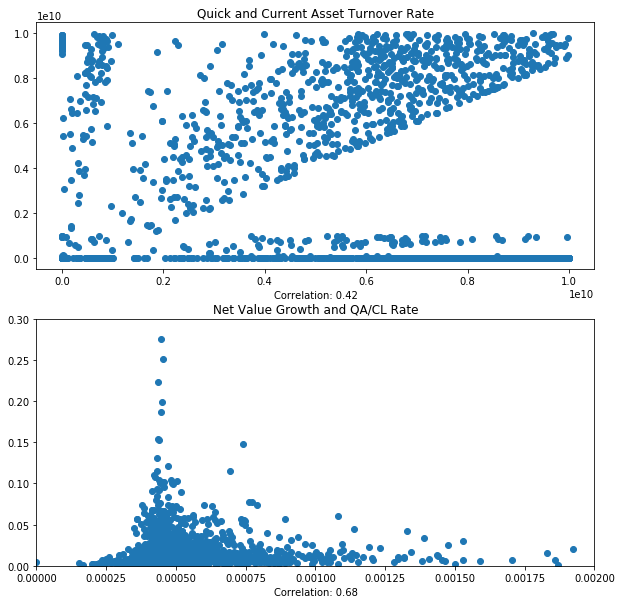

In [14]:
fig, axs = plt.subplots(2, figsize=(10,10))

sup1='Correlation: {0:.2f}'.format(X_train.corr()['Quick Asset Turnover Rate']['Current Asset Turnover Rate'])
axs[0].scatter(X_train['Quick Asset Turnover Rate'],X_train['Current Asset Turnover Rate'])
axs[0].set_xlabel(sup1)
axs[0].set_title('Quick and Current Asset Turnover Rate')

sup2='Correlation: {0:.2f}'.format(X_train.corr()['Net Value Growth Rate']['Quick Assets/Current Liability'])
axs[1].scatter(X_train['Net Value Growth Rate'],X_train['Quick Assets/Current Liability'])
axs[1].set_xlabel(sup2)
axs[1].set_xlim([0,0.002])
axs[1].set_ylim([0,0.3])
axs[1].set_title('Net Value Growth and QA/CL Rate')

<div style="text-align: justify">It is not possible to decide which variable to drop only by looking at the scatterplots. Regarding the first relationship, after some research we decided to drop the Quick Asset Turnover Rate because in its calculation it only includes quick and liquid assets, so we supposed that the Current Asset Turnover Rate would have given a more complete representation of the situation. As for the second relationship, we decided to drop the Quick Assets/Current Liability Rate because we supposed that in order to predict whether a bank is likely to go bankruptcy it would have been more informative to look at how the net value of the bank is increasing (or decreasing) over time, instead of just looking at a asset/liability ratio.<div>

In [15]:
X_train = X_train.drop(['Quick Asset Turnover Rate', 'Quick Assets/Current Liability'], axis = 1)
X_test = X_test.drop(['Quick Asset Turnover Rate', 'Quick Assets/Current Liability'], axis = 1)

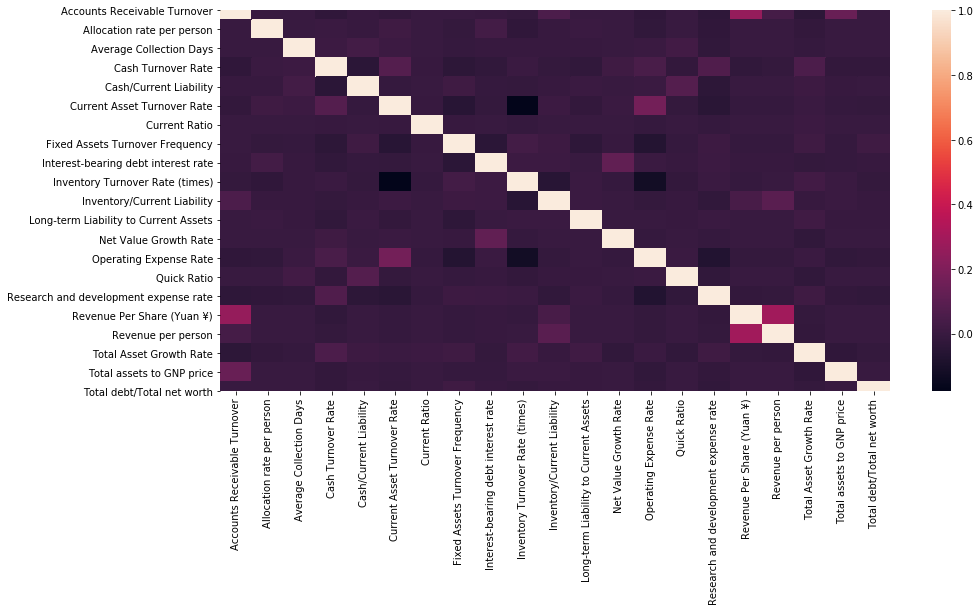

In [16]:
f, ax = plt.subplots(figsize=(15, 7))
corrMatrix = X_train.corr()
ax = sns.heatmap(corrMatrix)
plt.show()

As we can see there is no more correlation among variables inside our dataset. 

## 2. Machine Learning

## Unbalanced dataset ##

<div style="text-align: justify">We decided to perform different types of algorithms on the orginal unbalanced dataset in order to determine the best model in terms of accuracy. The models that we explored are: Logistic Regression, Support Vector Classifier (both hypertuned), Isolation Forest and Local Outlier Factors.<div>

In [118]:
start = time.time()
model_lr = LogisticRegression()

grid = {"C": np.logspace(-3,3,7),
        "penalty": ["l1","l2"]} # l1 (Lasso), l2 (Ridge)
log_reg = RandomizedSearchCV(model_lr, grid, cv=10)

log_reg.fit(X_train, y_train)
yhat = log_reg.predict(X_test)

end = time.time()
LogistiRegression_time = end-start
print("Fit Time: ",end-start)
print("Best parameters: ",log_reg.best_params_)
print("Accuracy :",log_reg.best_score_)

Fit Time:  3.880262851715088
Best parameters:  {'penalty': 'l2', 'C': 1.0}
Accuracy : 0.9655355042511005


In [23]:
def plot_roc_curve(model):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure(figsize = (10,7))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Confusion matrix, without normalization
[[1311    2]
 [  51    0]]
Normalized confusion matrix
[[0.99847677 0.00152323]
 [1.         0.        ]]


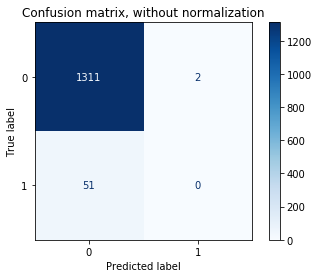

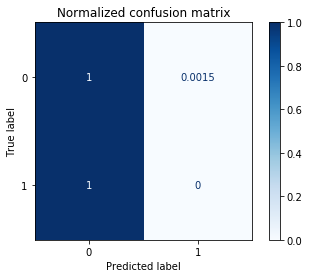

In [31]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(log_reg, X_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()



In [19]:
print(metrics.classification_report(y_test, yhat,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



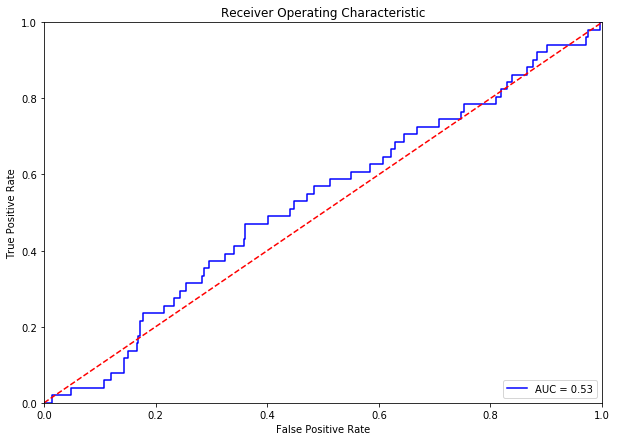

In [20]:
plot_roc_curve(log_reg)

<div style="text-align: justify">The Logistic Regression performs not in a good way. It take around 5 seconds to perform. Analyzing the results we can could conclude that it isn't a correct a model since looking at the ROC curve it has an AUC of 0.53, an accuracy of 0.96 on prediction on the train set based only on the observations which belong to class 0. In fact it is possible to see, from Confusion Matrix, that the algorithm classify in the right class 0 the amount of 1311 observations with an accuracy around 100% , while the other 53 observations are totally misclassified.<div>

In [123]:
start = time.time()
model_svc = SVC(probability = True)

grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}
svc = RandomizedSearchCV(model_svc, grid, cv=5, n_jobs = -1)

svc.fit(X_train, y_train)
yhat = svc.predict(X_test)
end = time.time()
SVC_time = end-start

print("Fit Time: ",end-start)
print("Best parameters: ",svc.best_params_)
print("Accuracy :", svc.best_score_)

Fit Time:  199.71452522277832
Best parameters:  {'kernel': 'rbf', 'gamma': 1, 'C': 0.1}
Accuracy : 0.969019248395967


Confusion matrix, without normalization
[[1311    2]
 [  51    0]]
Normalized confusion matrix
[[0.99847677 0.00152323]
 [1.         0.        ]]


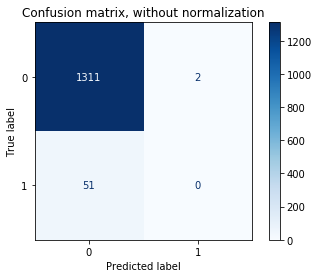

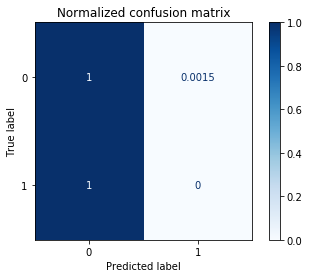

In [35]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(log_reg, X_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [36]:
print(metrics.classification_report(y_test, yhat,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



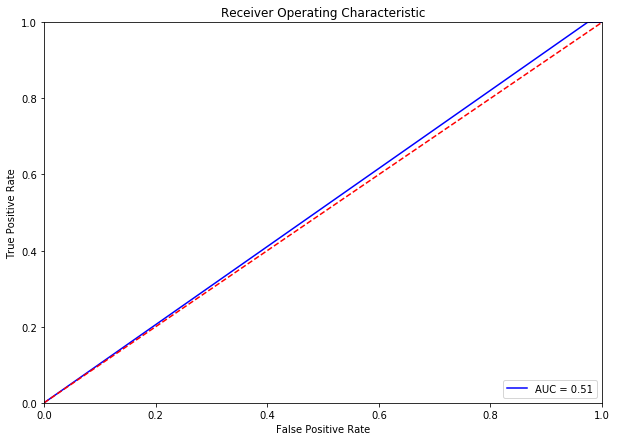

In [37]:
plot_roc_curve(svc)

<div style="text-align: justify">The SVC model performs more or less as Logistic Regression does. The algorithm obtain the same results in term of classification (Confusion Matrix) but a less AUC on test set which is 0.51 instead of 0.53 of Logistic Regression. The SVC takes also too much time, 222 seconds which are around four minutes.<div>


<div style="text-align: justify">We can deduced that both models perform badly. Since the dataset is strongly unbalanced these algorithms do not carry out a correct classification of the observations. So we need to move to more specific algorithm.<div>



In [124]:
bank_db_train = X_train.copy()
bank_db_train["Y"] = y_train
bank_db_test = X_test.copy()
bank_db_test["Y"] = y_test

bank_db = pd.concat([bank_db_train, bank_db_test])

In [125]:
inliers = bank_db[bank_db.Y == 0]
outliers = bank_db[bank_db.Y == 1]
inliers_train, inliers_test = train_test_split(inliers, test_size=0.20, random_state=42)

In [126]:
start = time.time()
iso_for = IsolationForest()
iso_for.fit(inliers_train)
inlier_pred_test = iso_for.predict(inliers_test)
outlier_pred = iso_for.predict(outliers)
end = time.time()
Isolation_Forest_time = end-start

In [43]:
print("Fit Time: ",end-start)
print("Accuracy in Detecting Stable Cases:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting Unstable Cases:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Fit Time:  0.4556152820587158
Accuracy in Detecting Stable Cases: 0.9810606060606061
Accuracy in Detecting Unstable Cases: 0.045454545454545456


In [127]:
start = time.time()
lof = LocalOutlierFactor(novelty=True)
lof.fit(inliers_train)
inlier_pred_test = lof.predict(inliers_test)
outlier_pred = lof.predict(outliers)
end = time.time()
Local_outlier_factor_time = end-start

In [ ]:
lof_cm=confusion_matrix(y_test, lof_y_pred_class)

In [45]:
print("Fit Time: ",end-start)
print("Accuracy in Detecting Stable Cases:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting Unstable Cases:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Fit Time:  1.3296191692352295
Accuracy in Detecting Stable Cases: 0.8977272727272727
Accuracy in Detecting Unstable Cases: 0.22727272727272727


<div style="text-align: justify">The algorithms that we choose for this specific case (unbalanced dataset) are Isolation Forest and Local Outlier Factor. Where Isolation Forest is an unsupervised learning algorithm for anomaly detection that works on the principle of isolating anomalies instead of the most common techniques of profiling normal points, in our case the anomaly detection is the unstable case coded as 1, the Isolation Forest detects and determines these outliers in order to predict correctly the observations if belong to class 0 or 1. Local Outlier Factor is an algorithm proposed by Markus M. Breunig, Hans-Peter Kriegel, Raymond T. Ng and Jörg Sander in 2000 for finding anomalous data points by measuring the local deviation of a given data point with respect to its neighbours. Both algorithms are used on strongly unbalanced dataset for anomalies detection as mentioned before. In our specific case we obtained for Isolation Forest an accuracy 0.9742 for predicting Stable Cases and an accuracy aroung 0.045 for predicting Unstable Cases with a computational time aroung 0.69 seconds while Local Outlier Factor performs 0.8977 for predicting Stable Cases and 0.2272 for Unstable Cases, the time is a little bit higher than Isolation Forest, around 1.30 seconds. </div>



<div style="text-align: justify">From these conclusions we can say that Logistic Regression and SVC aren't the correct solution since they take too time (SVC 222 seconds) and also the accuracy is very low. Both Isolation Forest and Local Outlier Factor perform better from time point of view and in term of accuracy. Maybe Local Outlier Factor is the best choice since it has an accuracy aroung 0.90 for Stable Class and 0.2277 for Unstable Class which is higher respect 0.0545 of Isolation Forest and it takes around 1.21 for complete the calculus which is a little bit higher respect the Isolation Forest computional time but still a good result.</div>


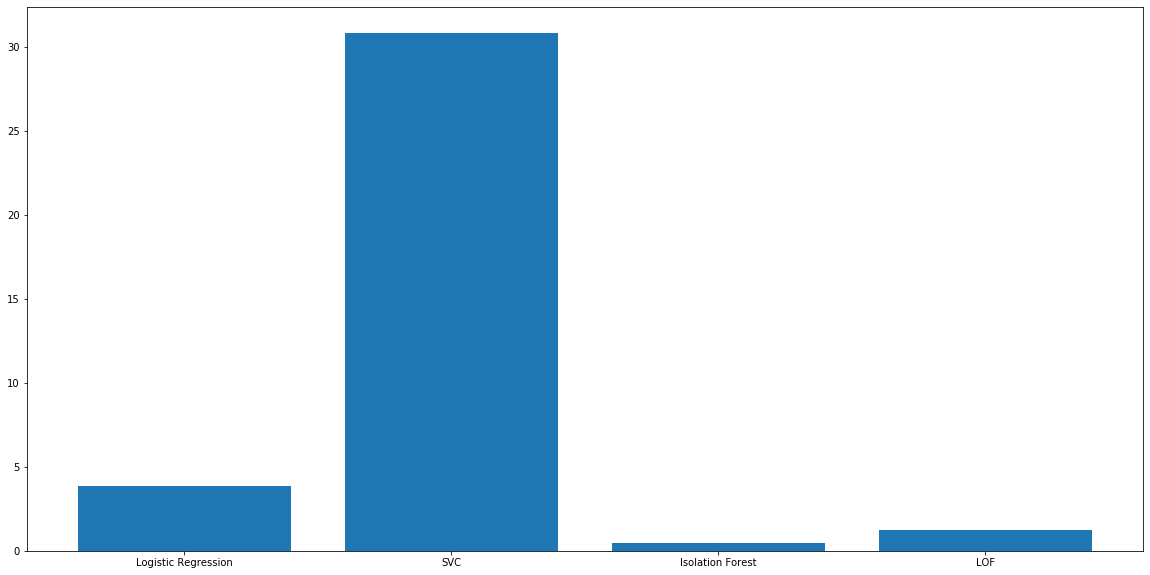

In [152]:
plt.figure(figsize=(20,10))
list_time = {'Logistic Regression':LogistiRegression_time,'SVC':SVC_time,'Isolation Forest':Isolation_Forest_time,'LOF':Local_outlier_factor_time}
keys = list_time.keys()
values = list_time.values()
plt.bar(range(len(list_time)), list(list_time.values()), align='center')
plt.xticks(range(len(list_time)), list(list_time.keys()))
plt.show()

As we can see the SVC algorithm takes too much time respect the others. In particular the order in decreasing time is: SVC, Logistic regression, LOF, Isolation Forest. 

## Balanced dataset ##

<div style="text-align: justify"> Resampling is the method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference. </div>



## SMOTE

<div style="text-align: justify"> Oversampling technique where the synthetic samples are generated for the minority class.Is a non parametric method (no underline distribution) and it focuses on the feature space to generate new instances. </div>



In [113]:
oversample = SMOTE()
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

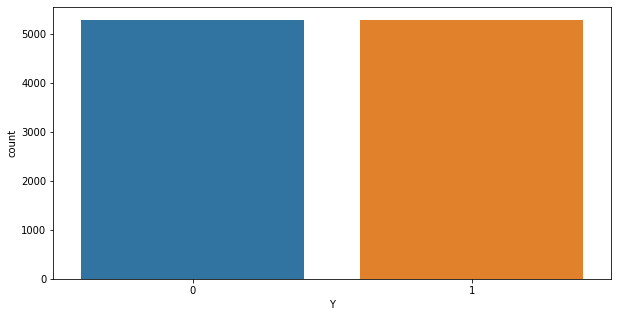

In [114]:
plt.figure(figsize = (10,5))
sns.countplot(y_train_over)
plt.show()

In [142]:
start = time.time()
model_lr = LogisticRegression()

grid = {"C": np.logspace(-3,3,7),
        "penalty": ["l1","l2"]} # l1 (Lasso), l2 (Ridge)
log_reg = RandomizedSearchCV(model_lr, grid, cv=10)

log_reg.fit(X_train_over, y_train_over)
yhat = log_reg.predict(X_test)
end = time.time()
Logistic_regression_time = end-start

print("Fit Time: ",end-start)
print("Best parameters: ",log_reg.best_params_)
print("Accuracy :",log_reg.best_score_)

Fit Time:  7.66606068611145
Best parameters:  {'penalty': 'l2', 'C': 100.0}
Accuracy : 0.597617020743875


Confusion matrix, without normalization
[[1062  251]
 [  28   23]]
Normalized confusion matrix
[[0.80883473 0.19116527]
 [0.54901961 0.45098039]]


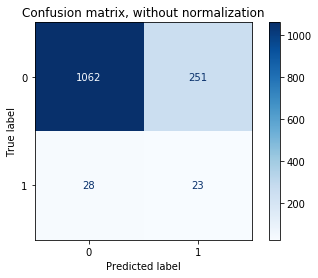

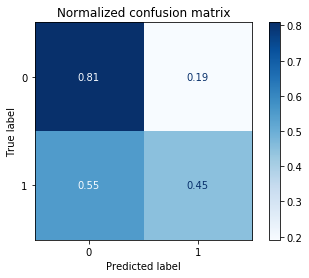

In [49]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(log_reg, X_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [50]:
print(metrics.classification_report(yhat, y_test,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1090
           1       0.45      0.08      0.14       274

    accuracy                           0.80      1364
   macro avg       0.63      0.53      0.51      1364
weighted avg       0.74      0.80      0.73      1364



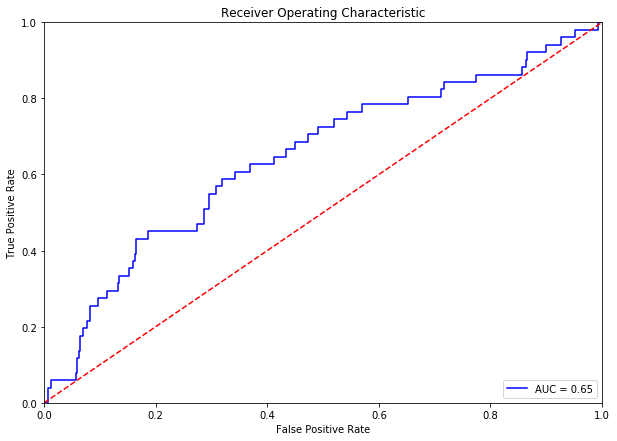

In [51]:
plot_roc_curve(log_reg)

In [143]:
start = time.time()
svc = SVC(probability = True)

svc.fit(X_train_over, y_train_over)
yhat = svc.predict(X_test)
end = time.time()
SVC_time = end-start

print("Fit Time: ",end-start)

Fit Time:  30.844093799591064


Confusion matrix, without normalization
[[1007  306]
 [  26   25]]
Normalized confusion matrix
[[0.76694593 0.23305407]
 [0.50980392 0.49019608]]


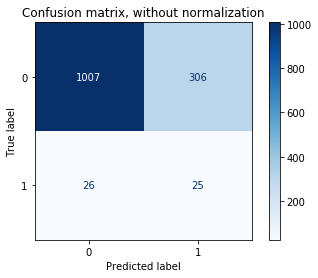

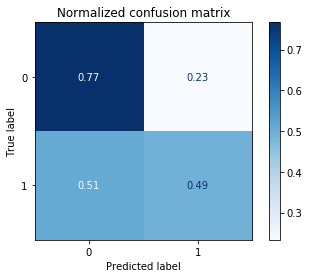

In [53]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [54]:
print(metrics.classification_report(yhat, y_test,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1033
           1       0.49      0.08      0.13       331

    accuracy                           0.76      1364
   macro avg       0.63      0.53      0.49      1364
weighted avg       0.70      0.76      0.68      1364



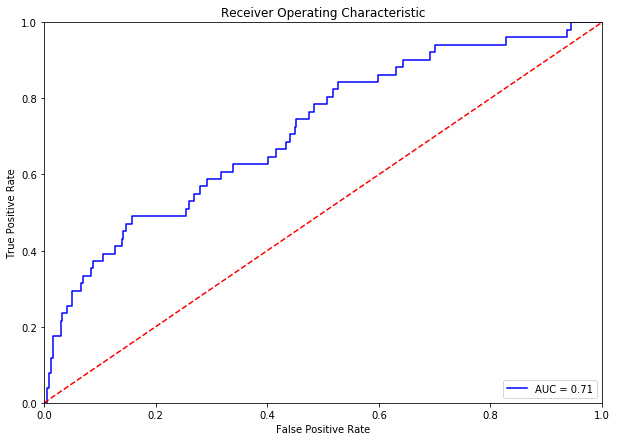

In [55]:
plot_roc_curve(svc)

In [144]:
start = time.time()
rf = RandomForestClassifier(bootstrap = True, max_features = "auto")

param_grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 500, num = 10)]}

rf_model = RandomizedSearchCV(rf, param_grid, n_iter = 100, n_jobs = -1)

rf_model.fit(X_train_over, y_train_over)
pred_rf = rf_model.predict(X_test)
end = time.time()
random_forest_time = end-start

print("Fit Time: ",end-start)

Fit Time:  460.78700375556946


Confusion matrix, without normalization
[[1285   28]
 [  21   30]]
Normalized confusion matrix
[[0.97867479 0.02132521]
 [0.41176471 0.58823529]]


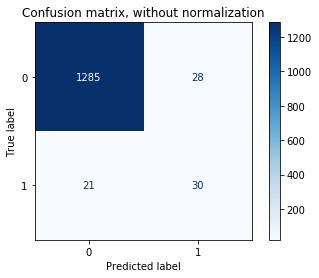

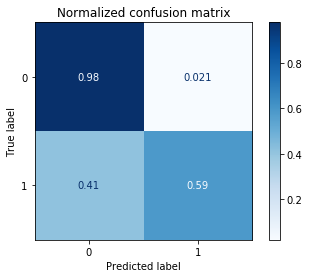

In [57]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf_model, X_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [58]:
print(metrics.classification_report(pred_rf, y_test,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1306
           1       0.59      0.52      0.55        58

    accuracy                           0.96      1364
   macro avg       0.78      0.75      0.77      1364
weighted avg       0.96      0.96      0.96      1364



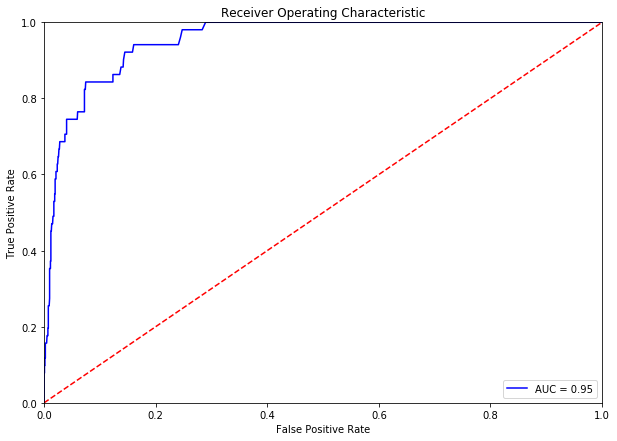

In [59]:
plot_roc_curve(rf_model)

## ADASYN

<div style="text-align: justify"> Generalized form of the SMOTE algorithm. This algorithm also aims to oversample the minority class by generating synthetic instances for it. But the difference here is it considers a density distribution,  which decides the number of synthetic instances generated for samples. </div>



In [146]:
oversample = ADASYN()
X_train_adasyn, y_train_adasyn = oversample.fit_resample(X_train, y_train)

In [147]:
start = time.time()
model_lr = LogisticRegression()

grid = {"C": np.logspace(-3,3,7),
        "penalty": ["l1","l2"]} # l1 (Lasso), l2 (Ridge)
log_reg = RandomizedSearchCV(model_lr, grid, cv=10)

log_reg.fit(X_train_adasyn, y_train_adasyn)
yhat = log_reg.predict(X_test)
end = time.time()
Logistic_regression_time_adasyin = end-start

print('time fit',end-start)
print("Best parameters: ",log_reg.best_params_)
print("Accuracy :",log_reg.best_score_)

time fit 5.2024266719818115
Best parameters:  {'penalty': 'l2', 'C': 100.0}
Accuracy : 0.5729131382644822


Confusion matrix, without normalization
[[1052  261]
 [  28   23]]
Normalized confusion matrix
[[0.80121858 0.19878142]
 [0.54901961 0.45098039]]


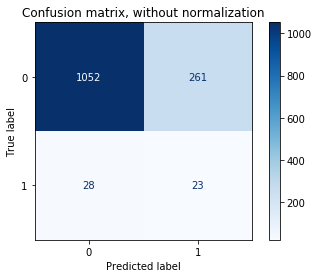

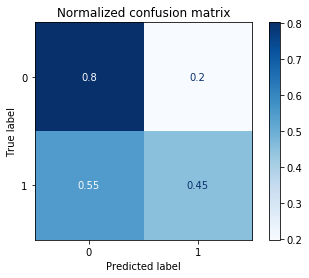

In [62]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(log_reg, X_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [63]:
print(metrics.classification_report(yhat, y_test,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1080
           1       0.45      0.08      0.14       284

    accuracy                           0.79      1364
   macro avg       0.63      0.53      0.51      1364
weighted avg       0.73      0.79      0.72      1364



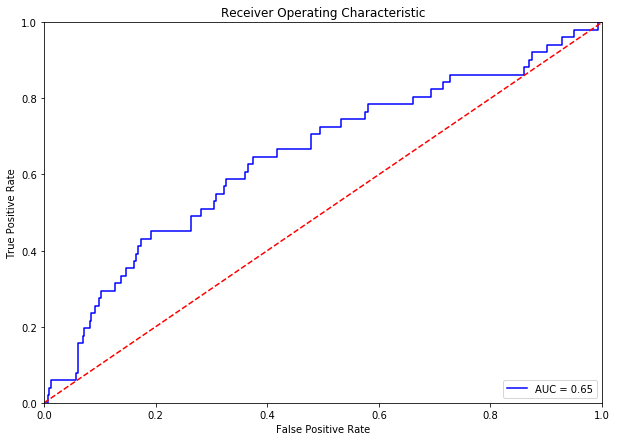

In [64]:
plot_roc_curve(log_reg)

In [148]:
start = time.time()
svc = SVC(probability = True)

svc.fit(X_train_adasyn, y_train_adasyn)
yhat = svc.predict(X_test)
end = time.time()
SVC_time_adasyn = end-start

print('time fit',end-start)

time fit 33.70564889907837


Confusion matrix, without normalization
[[986 327]
 [ 25  26]]
Normalized confusion matrix
[[0.75095202 0.24904798]
 [0.49019608 0.50980392]]


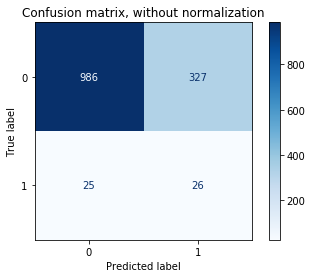

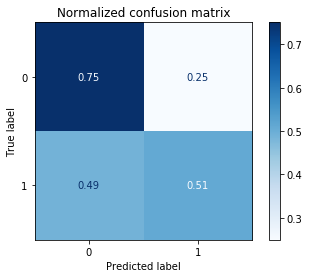

In [67]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [68]:
print(metrics.classification_report(yhat, y_test,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1011
           1       0.51      0.07      0.13       353

    accuracy                           0.74      1364
   macro avg       0.63      0.52      0.49      1364
weighted avg       0.69      0.74      0.66      1364



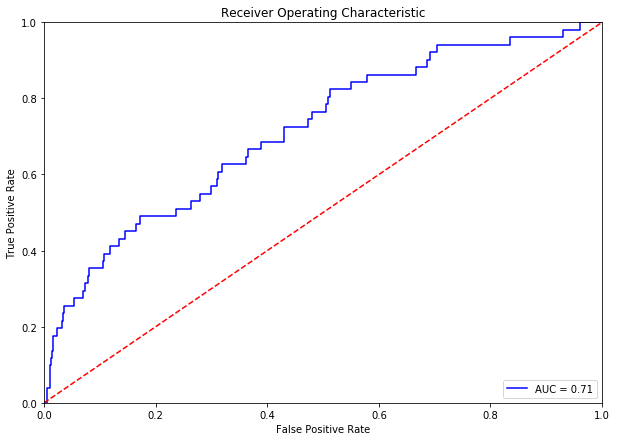

In [69]:
plot_roc_curve(svc)

In [149]:
start = time.time()
rf = RandomForestClassifier(bootstrap = True, max_features = "auto")

param_grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 500, num = 10)]}

rf_model = RandomizedSearchCV(rf, param_grid, n_iter = 100, n_jobs = -1)

rf_model.fit(X_train_adasyn, y_train_adasyn)
pred_rf = rf_model.predict(X_test)
end = time.time()
Random_forest_time_adasyn = end-start

print('time fit',end-start)

time fit 207.21622681617737


Confusion matrix, without normalization
[[1281   32]
 [  22   29]]
Normalized confusion matrix
[[0.97562833 0.02437167]
 [0.43137255 0.56862745]]


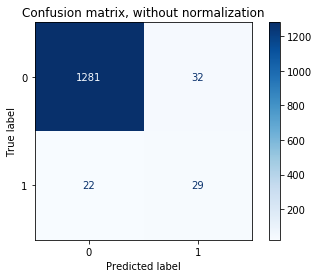

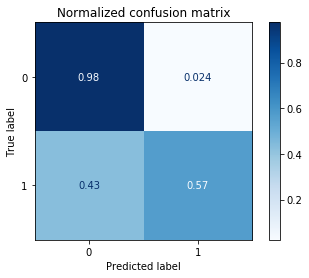

In [71]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf_model, X_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [72]:
print(metrics.classification_report(pred_rf, y_test,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1303
           1       0.57      0.48      0.52        61

    accuracy                           0.96      1364
   macro avg       0.77      0.73      0.75      1364
weighted avg       0.96      0.96      0.96      1364



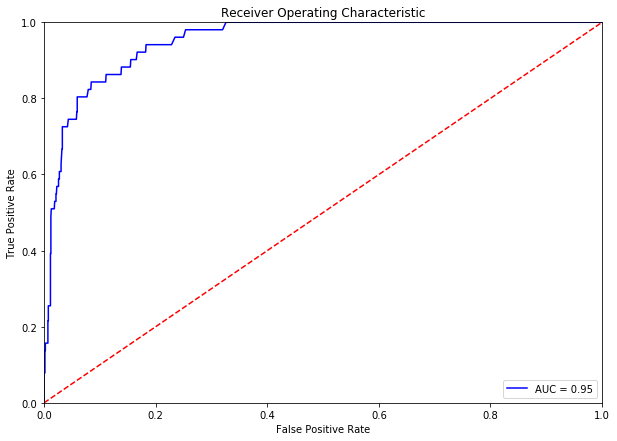

In [73]:
plot_roc_curve(rf_model)

<Figure size 1440x720 with 0 Axes>

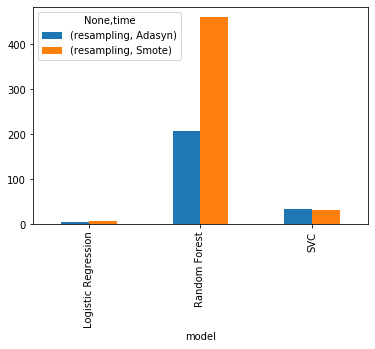

In [156]:
plt.figure(figsize=(20,10))
df = pd.DataFrame([['Logistic Regression', 'Logistic Regression', 'SVC', 'SVC','Random Forest','Random Forest'],['Smote','Adasyn','Smote','Adasyn','Smote','Adasyn'], 
                   [Logistic_regression_time,Logistic_regression_time_adasyin,SVC_time,SVC_time_adasyn,random_forest_time,Random_forest_time_adasyn]]).T
df.columns = ['model', 'time', 'resampling']
df.set_index(['model', 'time'], inplace=True)
df.unstack().plot.bar()

<div style="text-align: justify"> Algorithms perform with an high computational time cost in SMOTE resampling technique, the SVC performs more or less the same in both cases. In conclusion we can say that if we want to resampling the data we must use Random Forest algorithm beacuse it has an high accuracy: 98% for predicting class 0 and 57% for class 1. As resampling technique we should use ADASYN since Random Forest takes half time (222s) respect SMOTE (over 400s) and performs with the same accuracy.  </div>





## 3. Conclusions and Insights

<div style="text-align: justify"> 

- **Management**: most of the covariates are concentrated with respect to class 0, so they are significant indices for indicating banking stability. With respect to the variable Cash Turnover Rate it is important to underline that when the value decreases we move towards a situation of instability, in reference to the decrease of cash-flow.  If research and development expenses are reduced, we move towards a situation of strong instability close to class 1. Certainly the most significant variable to be taken into account is the Total Asset Turnover Rate, which indicates how, as the value of assets increases, we move decisively towards a significant instability due to the growth of exposure to risk. Therefore, in order to protect and control banking stability, it is necessary to refer mainly to these variables, controlling the internal cash turnover rate, ensuring that research and development expenditure is constant and significant, and not exposing oneself too much to risk through excessive asset purchases. 



- **Machine Learning**: we analysed two types of dataset: in the first case we performed an analysis on the unbalanced dataset (97% class 0, 3% class 1), we applied four classification algorithms, Logistic Regression, Support Vector Classifier, Isolation Forest and Local Outlier Factor. From the results we can say with certainty that Logistic Regression and SVC do not perform well (predictable scenario), while Isolation Forest and Local Outlier Factor perform better, as they are algorithms developed specifically for unbalanced datasets in that the prediction is focused on identifying the lowest class. Of the two, the best in absolute terms is the Local Outlier Factor, which has a higher accuracy than the Isolation Forest even if it takes a few seconds longer.In the second case we used the resampling method and obtained a distribution of the classes 50% and 50%. For resampling we used two similar techniques SMOTE and ADASYN applying three different classification algorithms for each: Logistic Regression,SVC, Random Forest. The results led us to state with certainty that in both cases the preferred algorithm is the Random Forest for its high accuracy. Compared to resampling techniques ADASYN is preferable because the algorithms tend to take less time to perform, so Random Forest in ADASYN is by far the best model of those explored. 


- **Improvements**: the first improvement to be suggested is to pay particular attention to the variables identified in the first point and indicative of stability, especially to monitor their trends.  The best model, as mentioned above, is the Random Forest with ADASYN resampling, but this poses a problem, i.e. resampling methodologies are not representative of reality in that unstable banks represent a very small percentage of the total, so it is plausible to analyse an unbalanced dataset like the original one. For this reason we suggest that the best algorithm is the Local Outlier Factor, whose performance in terms of accuracy prediction can be improved if a larger dataset with more observations belonging to class 1, i.e. the unstable class, is created. In this way the training of the algorithm would be more solid and the prediction more accurate. You could also try other models such as neural network or xgboost or hypertuning on LOF to improve its performance. 
</div>
